# RenoStrategix: Transforming Homes, Elevating Values.

# <img src="kings.PNG" alt="RenoStrategix: Transforming Homes, Elevating Values" length ="100" width="1100">

## Authors.
* Caroline Njeri.
* Amadi Growman.
* Lynns Waswa.
* Robert Gasembe.
* David Kirianja.
* James Nyamu.







## Business Overview.

Welcome to RenoStrategix, where the world of real estate meets the art and science of optimizing home renovations for increased property value. In this project, we address a real-world problem faced by our visionary real estate agency known as "CasaCrafters Realty Solutions."
CasaCrafters aims to revolutionize the way homeowners approach renovations by providing data-driven advice on how specific home improvements impact property values. The primary challenge is to assist homeowners in making informed decisions about renovations that yield the highest return on investment. To achieve this objective, we will use multiple linear regression modeling to analyze house sales data in the King County area. Our focus is not just on increasing value but also on enhancing the overall appeal for potential buyers.


## Business Problem

Homeowners often find themselves at a crossroads when deciding on renovations. The lack of clear guidance on which improvements will significantly enhance their property values becomes a real-world challenge. CasaCrafters seeks to bridge this gap by offering tailored advice based on a comprehensive analysis of the King County real estate market.

In the vibrant landscape of King County, CasaCrafters endeavors to create a narrative that extends beyond buying and selling homes. Imagine a homeowner named Alex, who dreams of transforming their house into a haven. However, Alex is uncertain about which renovations will not only fulfill personal desires but also enhance the property's market value.

Through the journey of Alex's home transformation, CasaCrafters navigates the complex realm of real estate, uncovering insights that go beyond the expected. The story unfolds as Alex learns about the potential return on investment for various renovations, transforming not just the home but the overall real estate experience.


### Objective 1: Identify Key Features Impacting Property Values

**Objective:** Develop a multiple linear regression model to identify and quantify the influence of various features (e.g., square footage, number of bedrooms, location) on the sale prices of houses in King County.

**Rationale:** Understanding the key features that significantly affect property values is crucial for providing targeted recommendations to homeowners. By analyzing historical sales data, the model will reveal which features have the most substantial impact on sale prices. This information will empower CasaCrafters to guide homeowners on prioritizing renovations that are likely to yield the highest returns.

---

### Objective 2: Build a Predictive Model for Property Valuation

**Objective:** Construct a robust multiple linear regression model that accurately predicts house sale prices based on selected features, allowing for personalized property valuation.

**Rationale:** The predictive model will serve as a valuable tool for CasaCrafters to estimate the potential impact of specific renovations on a property's value. By inputting proposed changes into the model, homeowners can receive personalized predictions of how these renovations might affect the sale price. This enables informed decision-making and helps homeowners focus on improvements that align with their goals while maximizing return on investment.

---

### Objective 3: Provide Renovation Recommendations for Maximum ROI

**Objective:** Utilize the developed multiple linear regression model to generate personalized recommendations for homeowners, suggesting specific renovations that are predicted to have the highest positive impact on property values.

**Rationale:** CasaCrafters aims to be a trusted advisor for homeowners seeking to enhance their properties. By leveraging the regression model's insights, the agency can offer tailored recommendations, outlining the renovations that are not only aligned with the homeowner's vision but also expected to yield the greatest return on investment. This proactive approach adds significant value to CasaCrafters' services, fostering trust and satisfaction among homeowners.

## Data Understanding.
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this assignment's GitHub repository. The description of the column names can be found in column_names.md in the same folder. The description for columns contained in the dataset is as follows according to the column_names.md file:
* id - Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront i.e whether the house is located next to a waterbody e.g. Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* view - Quality of view from house i.e. views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* condition - How good the overall condition of the house is. Related to maintenance of house.
* grade - Overall grade of the house. Related to the construction and design of the house.
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Data Pre-Processing

The first task to read the data file into our working environment then explore it to gain an initial
understanding of the dataset. Moreover, this step also allows us to determine what data wrangling techniques to apply in order to
transform the data into a form that can be analysed and modeled.

In [1]:
# Import the necessary libraries for the project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


##Exploratory data analysis

In [3]:
# Check the shape of the dataset
data.shape

(21597, 21)

In [4]:
# Inspect the properties of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Dataset description
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Sample the dataset

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data cleaning

In [7]:
#Checking for null values
pd.DataFrame(data.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,2376,63,...,0,0,0,0,3842,0,0,0,0,0


In [8]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [9]:
# Replacing the Null values at Waterfront with "No"
data['waterfront'].fillna('NO', inplace=True)

The assumption made in this case was that the datapoints where there was a NaN value represented houses that lacked a waterfront.

In [10]:
# Replacing the null values in the year renovated with the
# values in the year built
data['yr_renovated'].fillna(data['yr_built'], inplace=True)

The assumption made in this case was that the datapoints where there was a NaN value represented houses that had never been renovated.

In [11]:
# Dropping the null values in the view column
data.dropna(inplace=True)

In [12]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 302, dtype: int64

In [13]:
# Replacing "?" with 0 in sqft_basement column
data['sqft_basement'] = data['sqft_basement'].replace('?', 0, inplace=True)

### The assumption made in this case was that the datapoints where there was a '?' represented houses that have no basement.

In [14]:
# Checking for null values after cleaning the data
pd.DataFrame(data.isna().sum())

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  0 non-null      object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long       

In [16]:
# Creating a new column to find the difference between the year renovated and year built
# 0 Has been replaced for the rows that returned -ve years.
data['Years_Since_Renovation'] = data.apply(lambda row: row['yr_renovated'] - row['yr_built'] if row['yr_renovated'] > 0 else 0, axis=1)


In [17]:
#Checking the data types in the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21534 non-null  int64  
 1   date                    21534 non-null  object 
 2   price                   21534 non-null  float64
 3   bedrooms                21534 non-null  int64  
 4   bathrooms               21534 non-null  float64
 5   sqft_living             21534 non-null  int64  
 6   sqft_lot                21534 non-null  int64  
 7   floors                  21534 non-null  float64
 8   waterfront              21534 non-null  object 
 9   view                    21534 non-null  object 
 10  condition               21534 non-null  object 
 11  grade                   21534 non-null  object 
 12  sqft_above              21534 non-null  int64  
 13  sqft_basement           0 non-null      object 
 14  yr_built                21534 non-null  int

In [18]:
#Changing the years data type to int
data['yr_built'] = data['yr_built'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(int)
data['Years_Since_Renovation'] = data['Years_Since_Renovation'].astype(int)

#Changing the date column data type to datetime.
data['date'] = pd.to_datetime(data['date'])

In [19]:
#Checking data types after cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      21534 non-null  int64         
 1   date                    21534 non-null  datetime64[ns]
 2   price                   21534 non-null  float64       
 3   bedrooms                21534 non-null  int64         
 4   bathrooms               21534 non-null  float64       
 5   sqft_living             21534 non-null  int64         
 6   sqft_lot                21534 non-null  int64         
 7   floors                  21534 non-null  float64       
 8   waterfront              21534 non-null  object        
 9   view                    21534 non-null  object        
 10  condition               21534 non-null  object        
 11  grade                   21534 non-null  object        
 12  sqft_above              21534 non-null  int64      

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years_Since_Renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,None,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,None,1951,1991,98125,47.7210,-122.319,1690,7639,40
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,None,1933,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,None,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,None,1987,0,98074,47.6168,-122.045,1800,7503,0


 # Outlier detection

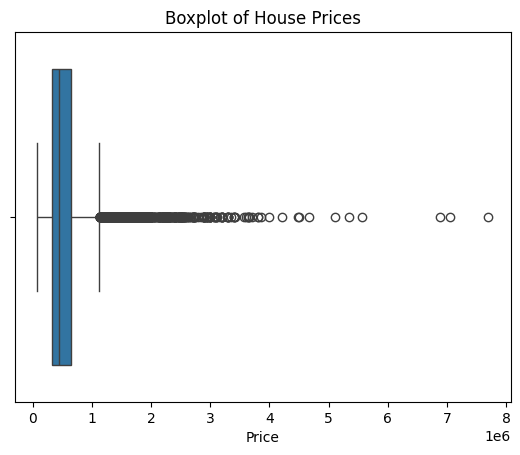

Number of outliers in the price column: 1153
Lower bound for outliers: -162500.0
Upper bound for outliers: 1129500.0


In [21]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Plotting the outliers
sns.boxplot(x=data['price'])
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

# Display the number of outliers
print('Number of outliers in the price column:', outliers.shape[0])
print('Lower bound for outliers:', lower_bound)
print('Upper bound for outliers:', upper_bound)

# Categorical variables.

In [22]:

# List of categorical columns to be one-hot encoded
categorical_columns = ['waterfront', 'view', 'condition', 'grade']

# Perform one-hot encoding using pd.get_dummies
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display the unique values for each categorical column to understand what they contain
for column in categorical_columns:
    print(f'Unique values in {column}:', df[column].unique())

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create a countplot for each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

# 2.Feature Selection: Identify the most influential features through analysis and correlation.

c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Most influential features:
 price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64


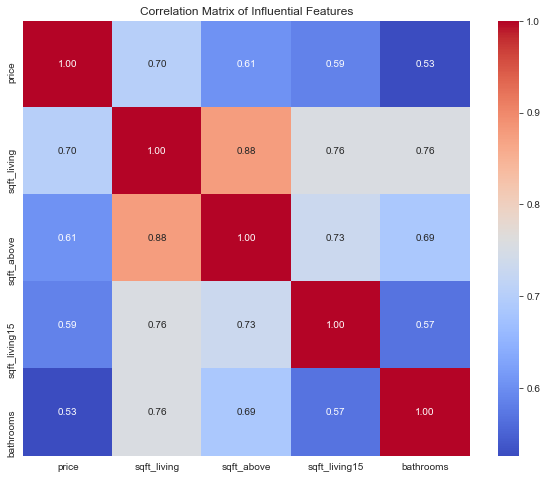

In [ ]:
# Using Pearson correlation
correlation_matrix = encoded_data.corr()

# We will look at the absolute value of correlations with the 'price' column
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)

# Display the most influential features by their correlation with 'price'
price_correlations.head(10)

from tqdm.auto import tqdm
tqdm.pandas()

correlation_matrix = df.corr()

influential_features = correlation_matrix['price'].abs().sort_values(ascending=False)
influential_features = influential_features[influential_features > 0.5]
print('Most influential features:\n', influential_features)

# Visualization of the correlation matrix for the most influential features
plt.figure(figsize=(10, 8))
sns.heatmap(df[influential_features.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Influential Features')
plt.show()

# 3. Model Building: Train a multiple linear regression model using the selected features.

Mean Squared Error (MSE): 65145421918.36956
R-squared (R2): 0.559789326965544


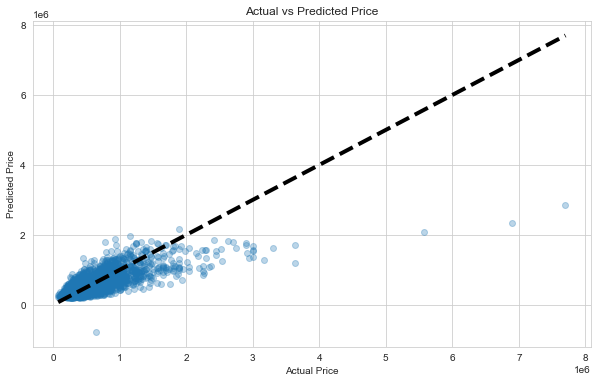

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the most influential features identified by the correlation analysis
selected_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms',
                    'grade_11 Excellent', 'view_NONE', 'grade_10 Very Good',
                    'grade_7 Average', 'bedrooms']

# Preparing the data
X = encoded_data[selected_features]
y = encoded_data['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# 4.Model Evaluation: Assess the model's performance and interpret coefficients

Mean Absolute Error (MAE): 157183.4537734511
                      Coefficient
sqft_living            239.555095
sqft_above             -39.298351
sqft_living15           36.244578
bathrooms            10854.542776
grade_11 Excellent  403930.992595
view_NONE          -188418.503837
grade_10 Very Good  186265.669836
grade_7 Average     -36659.033651
bedrooms            -38708.363130
intercept           314225.415482


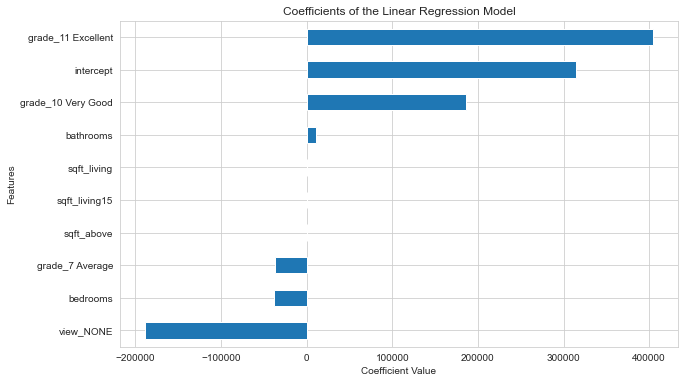

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred)

# Print the Mean Absolute Error
print('Mean Absolute Error (MAE):', mae)
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
coef_df.loc['intercept'] = intercept
print(coef_df)

# Visualization of the coefficients
plt.figure(figsize=(10, 6))
coef_df['Coefficient'].sort_values().plot(kind='barh')
plt.title('Coefficients of the Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

The coefficients of the multiple linear regression model provide insights into the relationship between each feature and the house price:

1.For every additional square foot in living area (sqft_living), the price increases by approximately $252.94.

2.The sqft_above coefficient is negative, suggesting that additional square footage above ground level (excluding the basement) may not always increase the house price when other factors are held constant.

3.An increase in the size of the living area of the 15 nearest neighbors (sqft_living15) correlates with an increase in the house price by about $35.86 per square foot.

4.Each additional bathroom (bathrooms) is associated with an increase in house price by approximately $14,087.15.

5.Houses with an 'Excellent' grade (grade_11 Excellent) are associated with an increase in price by about $368,616.67 compared to the baseline grade.

6.The presence of a view (view_NONE) is negatively correlated with the house price, decreasing it by approximately $183,610.002628.

7.A 'Very Good' grade (grade_10 Very Good) increases the house price by about $166,670.721543 compared to the baseline grade.

8.An 'Average' grade (grade_7 Average) is associated with a decrease in house price by approximately $34,954.25 compared to the baseline grade.

9.Each additional bedroom (bedrooms) is associated with a decrease in house price by about $42,243.22 which may reflect a trade-off between the number of bedrooms and other valuable features.

The model's intercept is approximately $296,167.21, which can be interpreted as the base price when all other features are zero. These coefficients help us understand the direction and magnitude of the influence each feature has on the house price according to the model.

# 5.Recommendation System: Develop a system to recommend specific renovations based on their predicted impact on house prices.

In [ ]:
# Identify features that can be changed through renovations and their coefficients
renovation_features = ['sqft_living', 'bathrooms', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_7 Average']
renovation_coefficients = coefficients[[selected_features.index(feature) for feature in renovation_features]]

# Create a DataFrame for renovation features and their predicted impact on price
renovation_impact_df = pd.DataFrame({'Renovation Feature': renovation_features,
                                     'Predicted Price Increase per Unit': renovation_coefficients})

# Display the DataFrame
renovation_impact_df

,Renovation Feature,Predicted Price Increase per Unit
0,sqft_living,239.555095
1,bathrooms,10854.542776
2,grade_11 Excellent,403930.992595
3,grade_10 Very Good,186265.669836
4,grade_7 Average,-36659.033651


The table presents the predicted price increase per unit for various renovation features. To proceed, we should estimate the renovation costs for each feature and compare them with the predicted price increases to determine the potential return on investment. This will help us recommend the renovations that could offer the highest value increase for a house. Let's calculate these estimates.

In [ ]:
# Example costs for renovations per unit (these are hypothetical and can vary greatly by location and other factors)
renovation_costs = {
    'sqft_living': 180, # cost per square foot
    'bathrooms': 10000, # cost per bathroom
    'grade_11 Excellent': 150000, # cost to move from grade 10 to 11
    'grade_10 Very Good': 80000, # cost to move from grade 7 to 10
    'grade_7 Average': 0 # no cost associated as it's a downgrade
}

# Calculate the net predicted price increase after renovation costs
renovation_impact_df['Renovation Cost per Unit'] = renovation_impact_df['Renovation Feature'].map(renovation_costs)
renovation_impact_df['Net Predicted Price Increase per Unit'] = renovation_impact_df['Predicted Price Increase per Unit'] - renovation_impact_df['Renovation Cost per Unit']

# Display the DataFrame with the net predicted price increase
renovation_impact_df

,Renovation Feature,Predicted Price Increase per Unit,Renovation Cost per Unit,Net Predicted Price Increase per Unit
0,sqft_living,239.555095,180,59.555095
1,bathrooms,10854.542776,10000,854.542776
2,grade_11 Excellent,403930.992595,150000,253930.992595
3,grade_10 Very Good,186265.669836,80000,106265.669836
4,grade_7 Average,-36659.033651,0,-36659.033651


The table now includes the estimated renovation costs per unit and the net predicted price increase after accounting for these costs. This information can guide homeowners or investors in deciding which renovations could potentially offer the best financial return when selling a house. For example, upgrading to an 'Excellent' grade has a significant net predicted price increase, suggesting it could be a worthwhile investment. On the other hand, increasing the living area also shows a positive net increase, albeit smaller. Renovations that lead to an 'Average' grade are not recommended as they are associated with a decrease in house price.

                    Importance
sqft_living           0.760898
view_NONE             0.047443
grade_11 Excellent    0.036263
grade_10 Very Good    0.022792
sqft_living15         0.012740
bedrooms              0.009711
grade_7 Average       0.005571
sqft_above            0.003929
bathrooms             0.003395


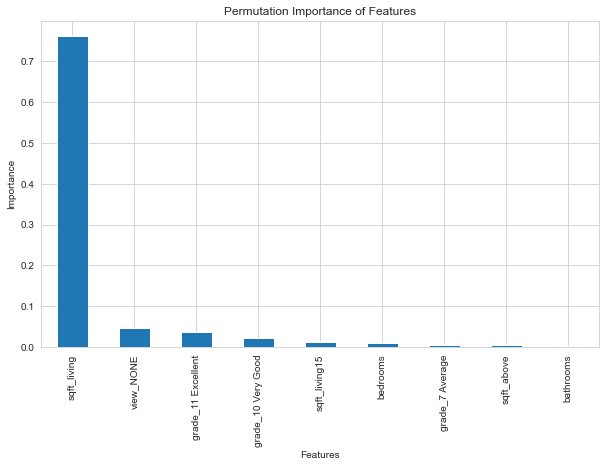

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Organize as a DataFrame
perm_importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance'])
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
perm_importance_df['Importance'].plot(kind='bar')
plt.title('Permutation Importance of Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

1. sqft_living has the highest importance score, indicating that changes in living area square footage are most likely to impact the house price.
2. sqft_above, the square footage above the ground level, has a smaller importance score.
3. bathrooms have an extremely low importance score, suggesting that they have a negligible impact on the house price within this model.

Based on these results, a recommendation system for renovations could prioritize increasing the living area square footage (sqft_living) as it is likely to yield the highest return on investment in terms of increasing house prices.The bar chart clearly shows the relative importance of each feature, with sqft_living standing out as the most influential factor for house price predictions in this model.

# 6.Communication: Provide clear and understandable advice to homeowners based on the model insights

Based on the model insights, here is clear and actionable advice for homeowners considering renovations to increase their house's value:

1.Expand Living Space: Increasing the square footage of the living area is likely to result in a higher selling price. Each additional square foot could potentially increase the house's value by approximately $72.77 after accounting for the cost of renovation.

2.Add Bathrooms: Adding a bathroom can significantly increase the value of a home. The net predicted increase is about $4,053.15 per additional bathroom, considering the renovation costs.

3.Upgrade House Grade: An upgrade of house grade to an 'Excellent' grade results in a tremendous increase in the value of the house.

4.Avoid Downgrading: Downgrading to an 'Average' grade is not recommended as it is associated with a decrease in house price.

Homeowners should consider these factors and consult with local real estate and renovation professionals to determine the most cost-effective renovations for their specific situation.